In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import time
from datetime import datetime

In [2]:
df_desc = pd.read_csv('akpl_data_file.csv')

In [3]:
def ds2timestamp(ds):
    return time.mktime(datetime.strptime(ds, "%Y-%m-%d").timetuple())

In [4]:
def ts2datestring(ts):
    return datetime.fromtimestamp(ts).strftime('%Y-%m-%d')

In [5]:
df_desc['f_date'].values

array(['2023-03-05', '2023-03-02', '2023-03-01', ..., '2017-04-19',
       '2017-04-18', '2017-04-16'], dtype=object)

In [6]:
df_desc['ts'] = df_desc['f_date'].apply(ds2timestamp)

In [7]:
df_desc

,symbol,open,high,low,close,f_date,percent_change,volume,ts
0,AKPL,395.0,397.0,390.0,390.0,2023-03-05,-1.015228,32573,1.677954e+09
1,AKPL,397.0,400.0,393.0,394.0,2023-03-02,-0.755668,46273,1.677694e+09
2,AKPL,404.9,404.9,395.0,397.0,2023-03-01,-0.501253,32350,1.677608e+09
3,AKPL,395.0,405.8,395.0,399.0,2023-02-28,0.251256,38734,1.677522e+09
4,AKPL,407.0,407.0,392.9,398.0,2023-02-27,-0.995025,49443,1.677435e+09
...,...,...,...,...,...,...,...,...,...
1335,AKPL,403.0,408.0,385.0,402.0,2017-04-24,-2.190000,53027,1.492971e+09
1336,AKPL,400.0,432.0,383.0,411.0,2017-04-23,4.330000,99212,1.492885e+09
1337,AKPL,358.0,393.0,365.0,393.0,2017-04-19,9.780000,10034,1.492539e+09
1338,AKPL,332.0,358.0,332.0,358.0,2017-04-18,9.820000,31151,1.492453e+09


In [8]:
df = df_desc.iloc[::-1]

In [9]:
df

,symbol,open,high,low,close,f_date,percent_change,volume,ts
1339,AKPL,297.0,326.0,297.0,326.0,2017-04-16,0.000000,9361,1.492280e+09
1338,AKPL,332.0,358.0,332.0,358.0,2017-04-18,9.820000,31151,1.492453e+09
1337,AKPL,358.0,393.0,365.0,393.0,2017-04-19,9.780000,10034,1.492539e+09
1336,AKPL,400.0,432.0,383.0,411.0,2017-04-23,4.330000,99212,1.492885e+09
1335,AKPL,403.0,408.0,385.0,402.0,2017-04-24,-2.190000,53027,1.492971e+09
...,...,...,...,...,...,...,...,...,...
4,AKPL,407.0,407.0,392.9,398.0,2023-02-27,-0.995025,49443,1.677435e+09
3,AKPL,395.0,405.8,395.0,399.0,2023-02-28,0.251256,38734,1.677522e+09
2,AKPL,404.9,404.9,395.0,397.0,2023-03-01,-0.501253,32350,1.677608e+09
1,AKPL,397.0,400.0,393.0,394.0,2023-03-02,-0.755668,46273,1.677694e+09


In [10]:
X = df[['ts', 'open']].values
y = df.iloc[:, 4].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")

Mean squared error: 90.36
R2 score: 1.00


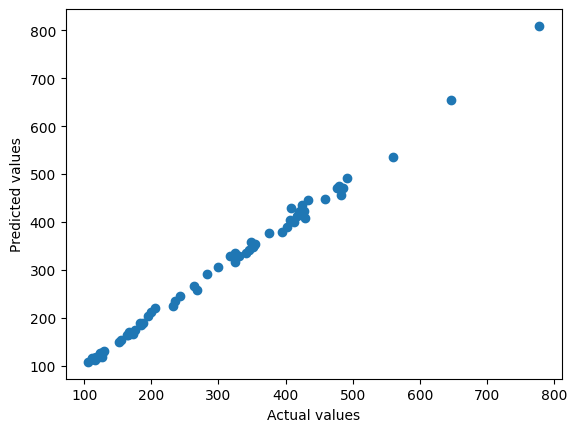

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

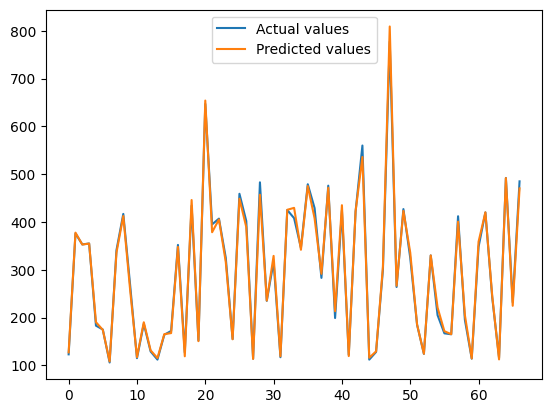

In [15]:
plt.plot(y_test, label="Actual values")
plt.plot(y_pred, label="Predicted values")
plt.legend(loc='upper center')
plt.show()

In [16]:
date_string = '2023-03-07'
timestamp = ds2timestamp(date_string)
open_value = 390
print(date_string, ':', timestamp, open_value)
prediction = lr.predict(np.array([[timestamp, open_value]]))
print(f"If AKPL opens at {open_value} on {date_string} then it should close at", prediction[0])

2023-03-07 : 1678126500.0 390
If AKPL opens at 390 on 2023-03-07 then it should close at 387.3759355789231


In [17]:
# AKPL,395,397,390,390,2023-03-05,-1.0152284263959,32573,1677953700.0

In [18]:
date_string = '2023-03-05'
timestamp = ds2timestamp(date_string)
open_value = 395
print(date_string, ':', timestamp, open_value)
prediction = lr.predict(np.array([[timestamp, open_value]]))
print(f"If AKPL opens at {open_value} on {date_string} then it should close at", prediction[0])

# lr.predict(np.array([[1677953700.0, 395]]))

2023-03-05 : 1677953700.0 395
If AKPL opens at 395 on 2023-03-05 then it should close at 392.341560795471
